In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, BayesianRidge, RANSACRegressor, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("kc_house_data .csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# iterate through the columns to see the frequency of different values
for i in df.columns:
    print(df[i].value_counts())

795000620     3
2206700215    2
643300040     2
3333002450    2
1995200200    2
             ..
3420069065    1
7812801125    1
4364700875    1
3021059276    1
1777500160    1
Name: id, Length: 21436, dtype: int64
20140623T000000    142
20140625T000000    131
20140626T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20150110T000000      1
20140727T000000      1
20140517T000000      1
20150527T000000      1
20150515T000000      1
Name: date, Length: 372, dtype: int64
450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
641500.0      1
575950.0      1
674250.0      1
608700.0      1
884744.0      1
Name: price, Length: 4028, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.5

In [7]:
df.date.dtypes

dtype('O')

In [8]:
# format the date
d=[]
for i in df['date'].values:
    d.append(i[:4])
df['date']=d

In [9]:
df.date.dtypes

dtype('O')

In [10]:
# Converting to same datatype
for i in df.columns:
    df[i]=df[i].astype(float)

In [11]:
df.dtypes

id               float64
date             float64
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
zipcode          float64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

In [12]:
# make a new column of age of the house 
df['age'] = df['date'] - df['yr_built']

# Calculate the total years of renovation
df['renov_age'] = np.abs(df['yr_renovated'] - df['yr_built'])
df['renov_age']

0        1955.0
1          40.0
2        1933.0
3        1965.0
4        1987.0
          ...  
21608    2009.0
21609    2014.0
21610    2009.0
21611    2004.0
21612    2008.0
Name: renov_age, Length: 21613, dtype: float64

In [13]:
df['renov_age'] = df.renov_age.apply(lambda x: x if len(str(int(x))) == 2 else 0.0)
df['renov_age']

0         0.0
1        40.0
2         0.0
3         0.0
4         0.0
         ... 
21608     0.0
21609     0.0
21610     0.0
21611     0.0
21612     0.0
Name: renov_age, Length: 21613, dtype: float64

In [14]:
# remove the unwanted columns like yr_built, date, id
df.drop(['id', 'date', 'yr_built', 'yr_renovated'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renov_age
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,59.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,98125.0,47.7210,-122.319,1690.0,7639.0,63.0,40.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,82.0,0.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,98136.0,47.5208,-122.393,1360.0,5000.0,49.0,0.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,28.0,0.0


In [15]:
# print highly correlated variables
corr_features = []
for i, r in df.corr().iterrows():
    k=0
    for j in range(len(r)):
        if i!=r.index[k]:
            if r.values[k]>=0.5:
                corr_features.append([i, r.index[k], r.values[k]])
        k+=1
corr_features

[['price', 'bathrooms', 0.5251375054139724],
 ['price', 'sqft_living', 0.7020350546118009],
 ['price', 'grade', 0.667434256020255],
 ['price', 'sqft_above', 0.6055672983560842],
 ['price', 'sqft_living15', 0.5853789035795697],
 ['bedrooms', 'bathrooms', 0.5158836376158442],
 ['bedrooms', 'sqft_living', 0.5766706925022366],
 ['bathrooms', 'price', 0.5251375054139724],
 ['bathrooms', 'bedrooms', 0.5158836376158442],
 ['bathrooms', 'sqft_living', 0.7546652789673779],
 ['bathrooms', 'floors', 0.5006531725878427],
 ['bathrooms', 'grade', 0.6649825338781631],
 ['bathrooms', 'sqft_above', 0.6853424758761738],
 ['bathrooms', 'sqft_living15', 0.5686342895782329],
 ['sqft_living', 'price', 0.7020350546118009],
 ['sqft_living', 'bedrooms', 0.5766706925022366],
 ['sqft_living', 'bathrooms', 0.7546652789673779],
 ['sqft_living', 'grade', 0.7627044764584873],
 ['sqft_living', 'sqft_above', 0.8765965986813212],
 ['sqft_living', 'sqft_living15', 0.7564202590172227],
 ['sqft_lot', 'sqft_lot15', 0.71855

In [16]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renov_age
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,59.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,98125.0,47.7210,-122.319,1690.0,7639.0,63.0,40.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,82.0,0.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,98136.0,47.5208,-122.393,1360.0,5000.0,49.0,0.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,28.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0,5.0,0.0
21609,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0,1.0,0.0
21610,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0,5.0,0.0
21611,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0,11.0,0.0


In [17]:
df.iloc[:,0].name

'price'

In [18]:
# Correlation with target 
features = df.iloc[:,1:].columns.tolist()
target = df.iloc[:,0].name

correlations = {}
for f in features:
    df_temp = df[[f,target]]
    x1=df_temp[f].values
    x2=df_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [19]:
x1

array([ 0., 40.,  0., ...,  0.,  0.,  0.])

In [20]:
key

'renov_age vs price'

In [21]:
df_correlations = pd.DataFrame(correlations, index=['Value']).T
df_correlations.loc[df_correlations['Value'].sort_values(ascending=False).index]

,Value
sqft_living vs price,0.702035
grade vs price,0.667434
sqft_above vs price,0.605567
sqft_living15 vs price,0.585379
bathrooms vs price,0.525138
view vs price,0.397293
sqft_basement vs price,0.323816
bedrooms vs price,0.308350
lat vs price,0.307003
waterfront vs price,0.266369


We can see that the top 5 features are most correlated

#### Lets's plot the best 2 regressors jointly

<AxesSubplot:>

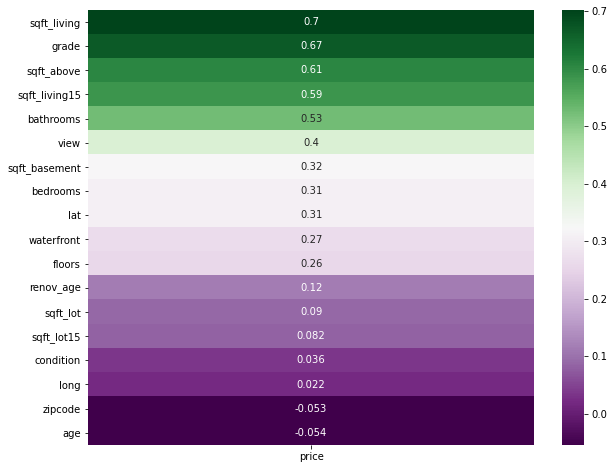

In [22]:
plt.figure(figsize=(10,8))
#cancel_corr.abs().sort_values(ascending=False)[1:]
sns.heatmap(df.corr()[['price']].sort_values('price',ascending=False)[1::],
                                                    annot=True,cmap='PRGn')

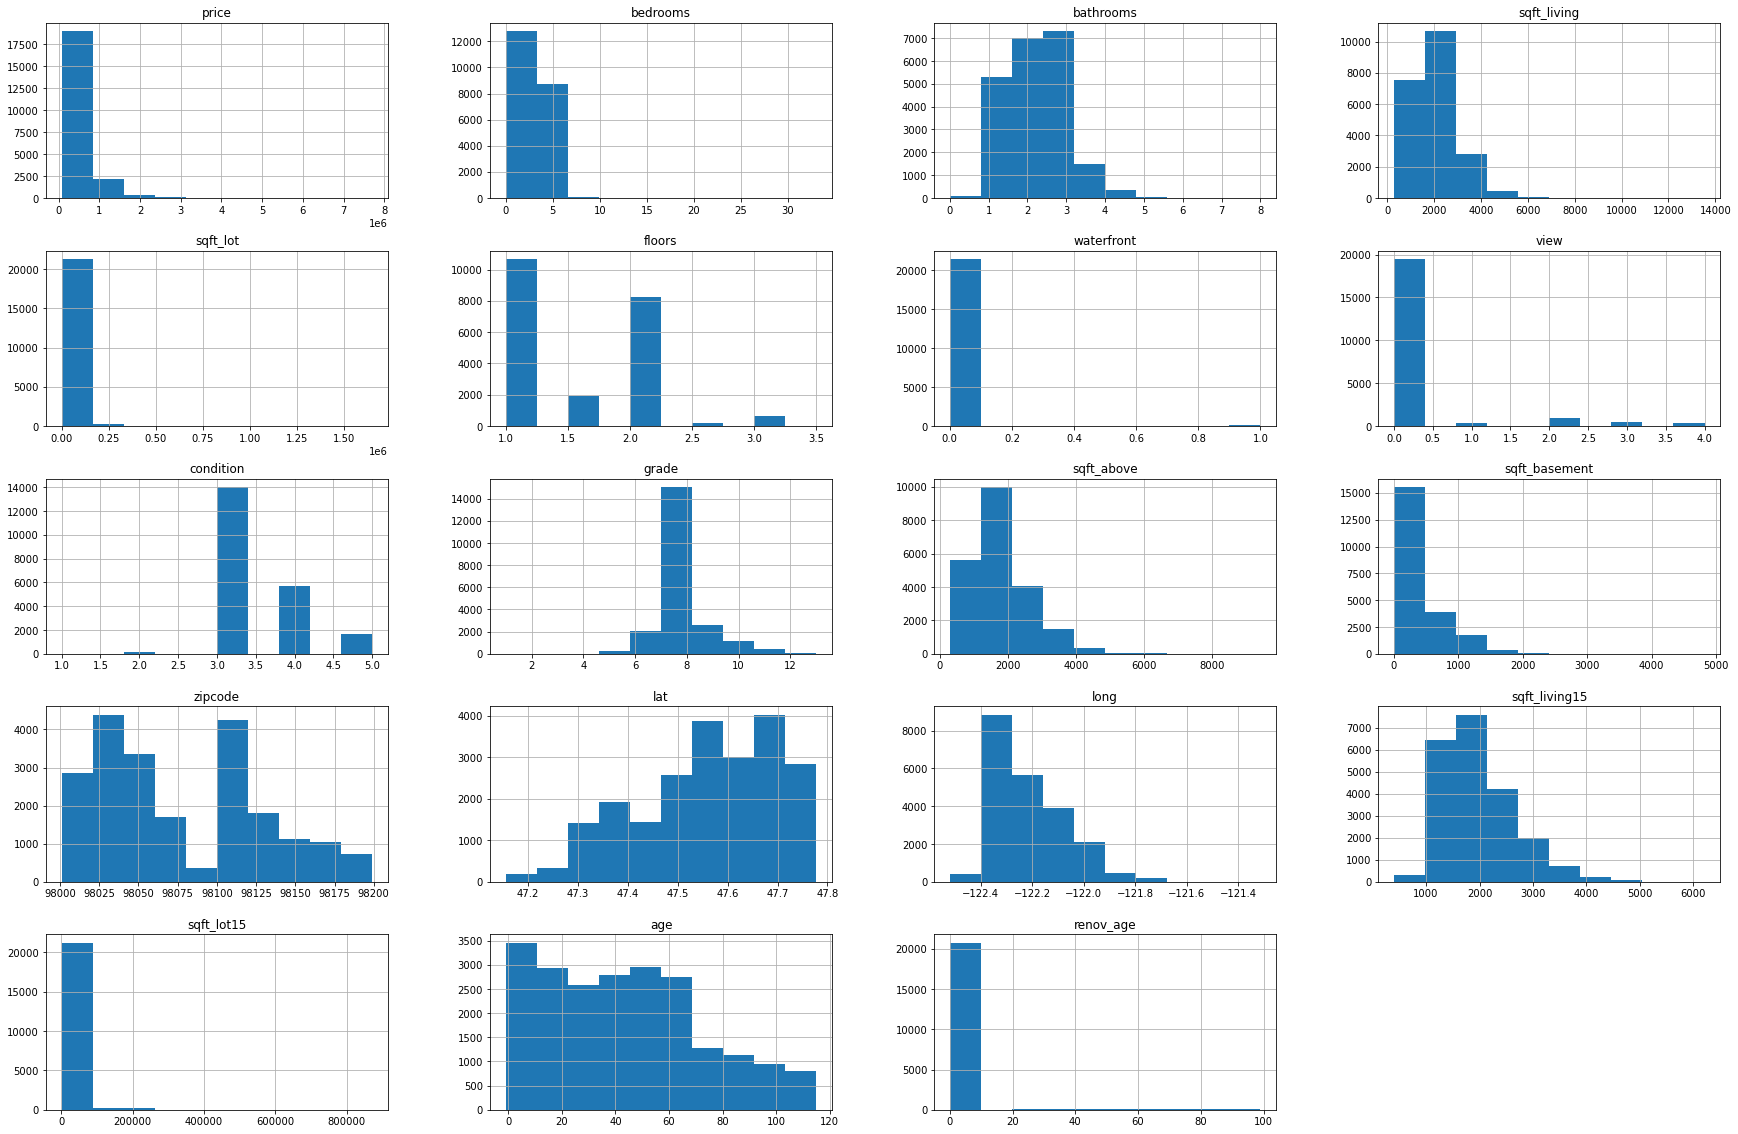

In [23]:
# plot the frequency of the columns
df.hist(figsize=(30,20))
plt.show()

In [ ]:
# let us remove highly correlated features that are above 0.9
feat = []
for i in corr_features

In [36]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'age', 'renov_age'],
      dtype='object')

## Predicting house sales prices

In [25]:
X=df.drop(columns=['price'])
y=df['price']

C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

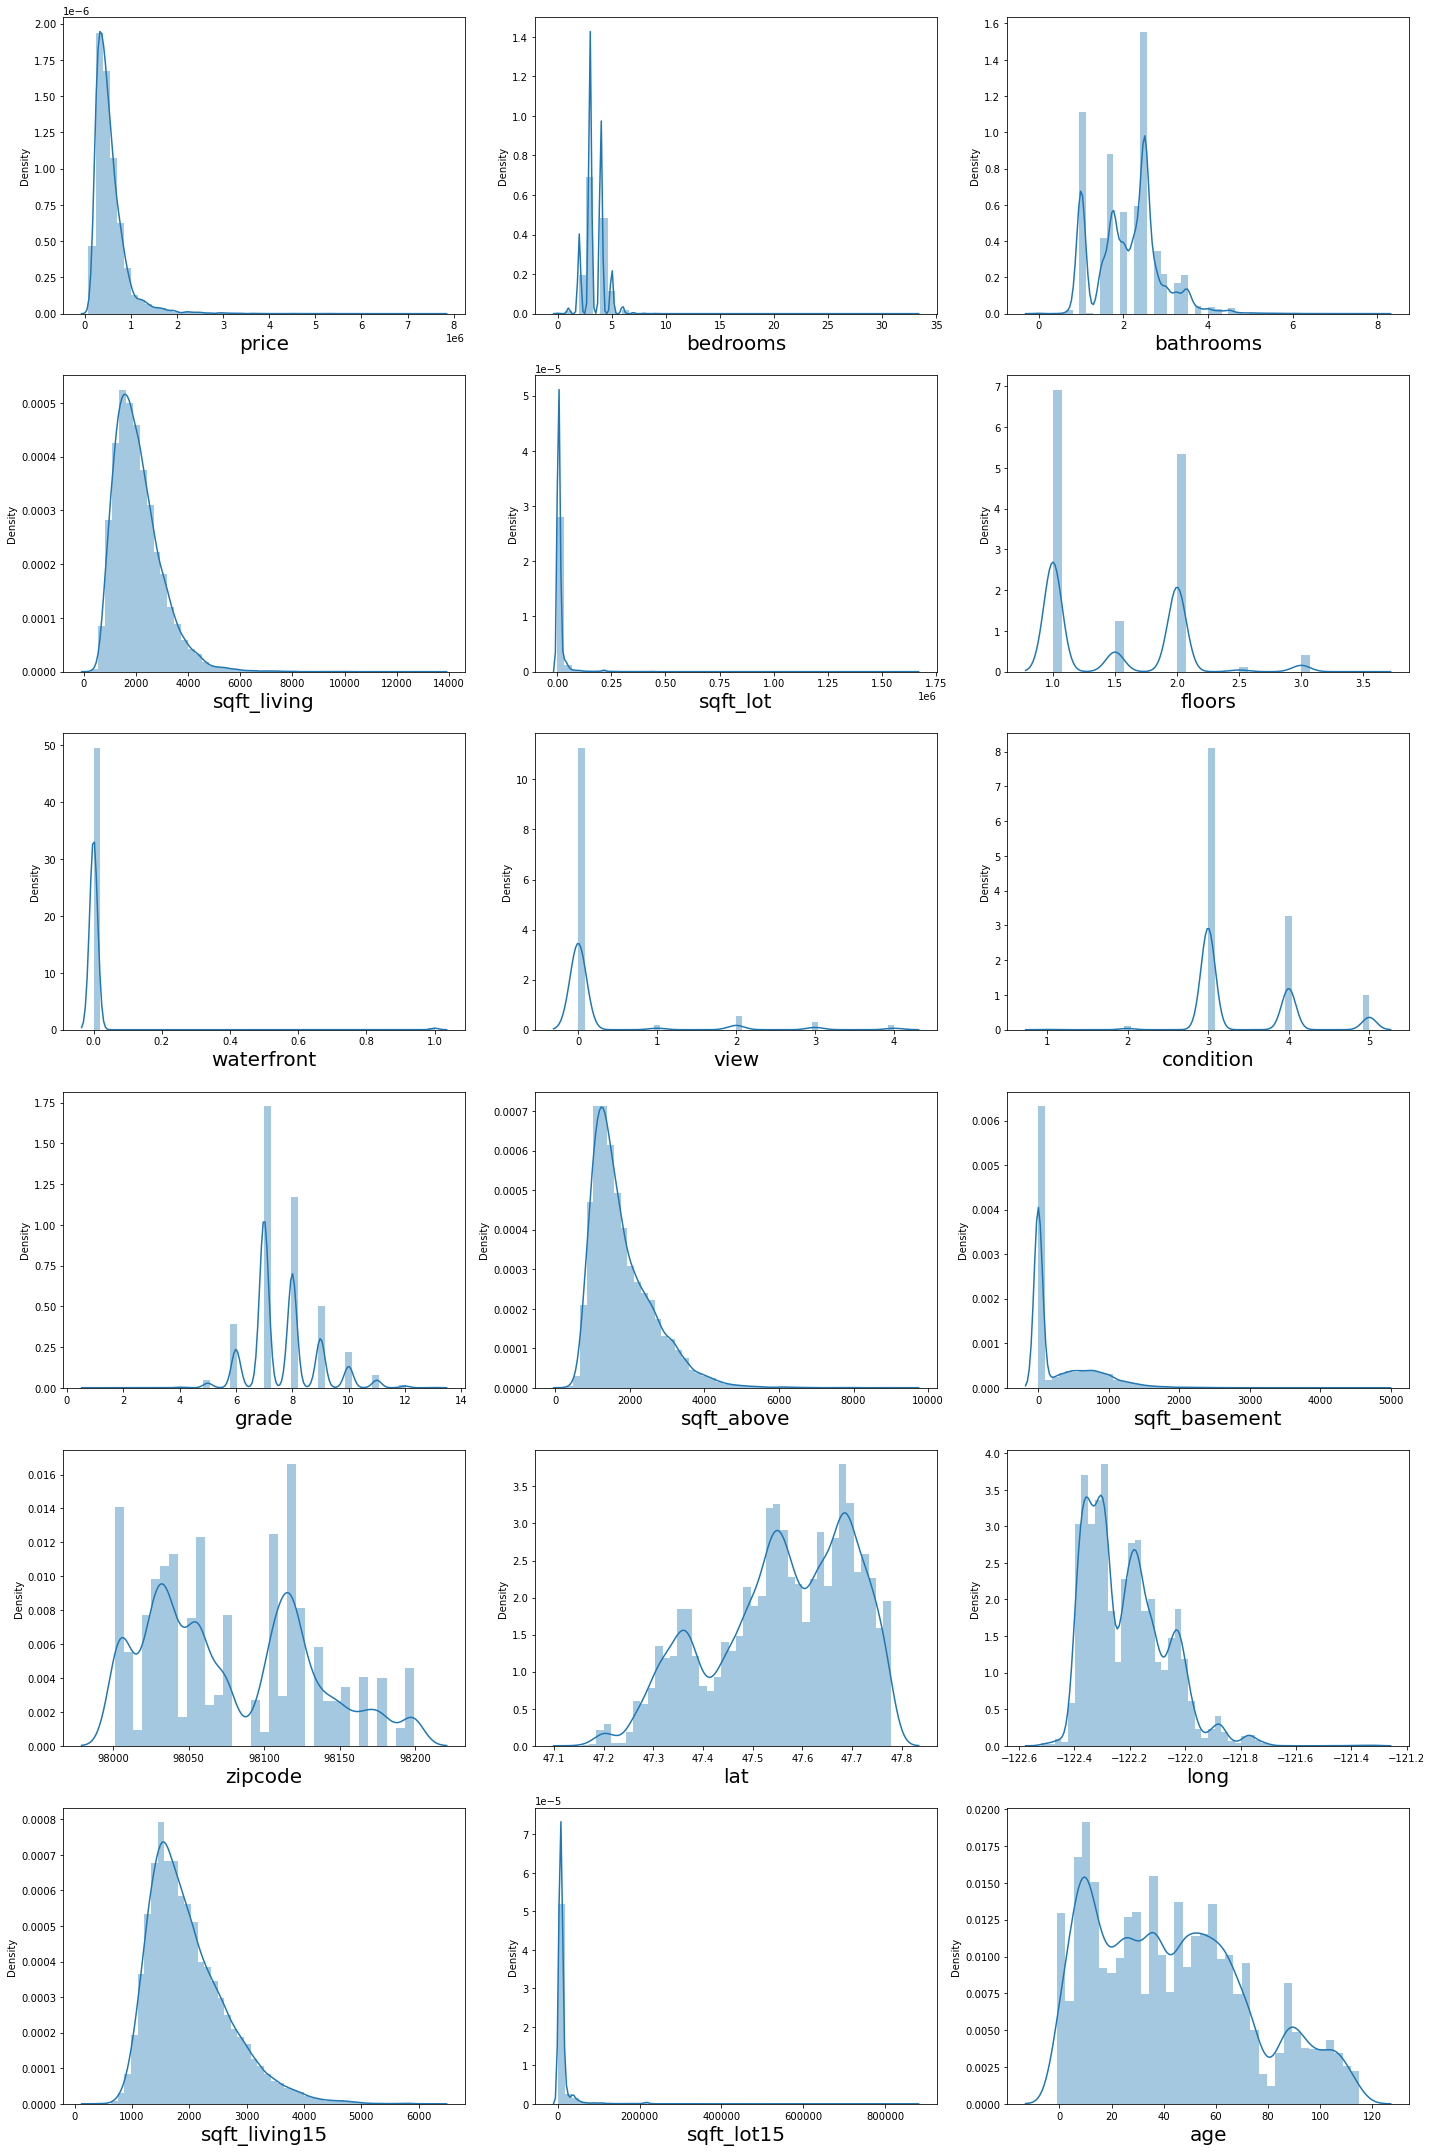

In [50]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=18 :
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [37]:
# lets move ahead and check multicollinearity

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# We create a new DataFrame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# We do not include categorical values for multicollinearity as they do not provide much information as numerical ones do

vif = pd.DataFrame()
# here we make use of variance inflation factor, which will basically output the respective VIFs
vif['VIF'] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif['Features']=X.columns

C:\Users\home\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [45]:
vif

,VIF,Features
0,1.651992,bedrooms
1,3.353622,bathrooms
2,inf,sqft_living
3,2.102753,sqft_lot
4,2.015871,floors
5,1.201242,waterfront
6,1.434857,view
7,1.249551,condition
8,3.419526,grade
9,inf,sqft_above


In [46]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=355)
y_train

14263     775000.0
4095      265000.0
21114    1139990.0
8237      250000.0
11669     300000.0
           ...    
20765     770000.0
20467     870000.0
20369    1800000.0
7459      825000.0
19074     447000.0
Name: price, Length: 16209, dtype: float64

In [47]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renov_age
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,59.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,98125.0,47.7210,-122.319,1690.0,7639.0,63.0,40.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,82.0,0.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,98136.0,47.5208,-122.393,1360.0,5000.0,49.0,0.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,28.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0,5.0,0.0
21609,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0,1.0,0.0
21610,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0,5.0,0.0
21611,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0,11.0,0.0
